In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Generate the synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Rescale the features to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
import numpy as np

from squlearn import Executor
from squlearn.qelm.qelm_regression import QELMRegressor

from squlearn.encoding_circuit import ChebyshevPQC

ImportError: cannot import name 'QELMRegressor' from 'squlearn.qelm.qelm_classification' (C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qelm\qelm_classification.py)

In [ ]:
pqc = ChebyshevPQC(8,2)

exec = Executor()

qelm  = QELMRegressor(pqc,executor=exec)

In [ ]:
qelm.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = qelm.predict(X_test)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


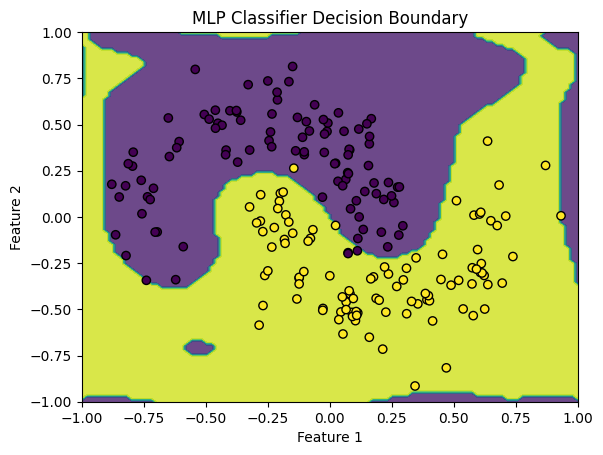

In [ ]:
# Step 6: Print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot the predictions against the true values
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('MLP Regressor Predictions vs True Values')
plt.legend()
plt.show()